## 1. 데이터셋 로드

In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font',family = 'AppleGothic')
elif platform.system() == 'Windows':
    path="C:/Windows/Fonts/Malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
else:
    print("OS not used")

In [3]:
import os 

HOUSING_PATH = 'datasets/housing'

In [6]:
import pandas as pd

housing = pd.read_csv('datasets/housing.csv')

In [7]:
# housing = load_housing_data()
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


## 2. 데이터 분리 및 이해하기

In [4]:
# longitude: 경도 
# latitude: 위도
# housing_median_age: 중간 노후연식
# total_rooms: 방 개수
# total_bedrooms: 침실 개수
# population: 인구
# households: 새대
# median_income: 중간 수입
# median_house_value: 중간 집 값
# ocean_proximity: 해변 근접

### 2-1. 

In [8]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [9]:
# info: 간략한 정보 (전체 행 수, na값 개수 등)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
# value_counts: 시리즈 value의 Counts를 확인 
# 범주형 contents
housing['ocean_proximity'].value_counts()


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
# describe: 수치형 특성 요약 정보

# ax+b에서 아까는 x값이 하나였지만 이번에는 x값이 7개이다 (y값에 영향을 줄 수 있는 성분들)
# 성분마다 값의 격차가 크고 작음이 달라서 값이 변함에 따라 기울기 변화값이 다르다 
# 즉, min과 max의 격차가 큰 값들은 값이 변할때 마다 기울기 변화 값이 크다 > 잘 못배움, 오차가 큼
# 학습을 빠르고 정화하게 시키려면 최소값과 최대값 격차를 맞춰줘야해 
# 

housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### 2-2. 데이터 형태 히스토그램 그리기

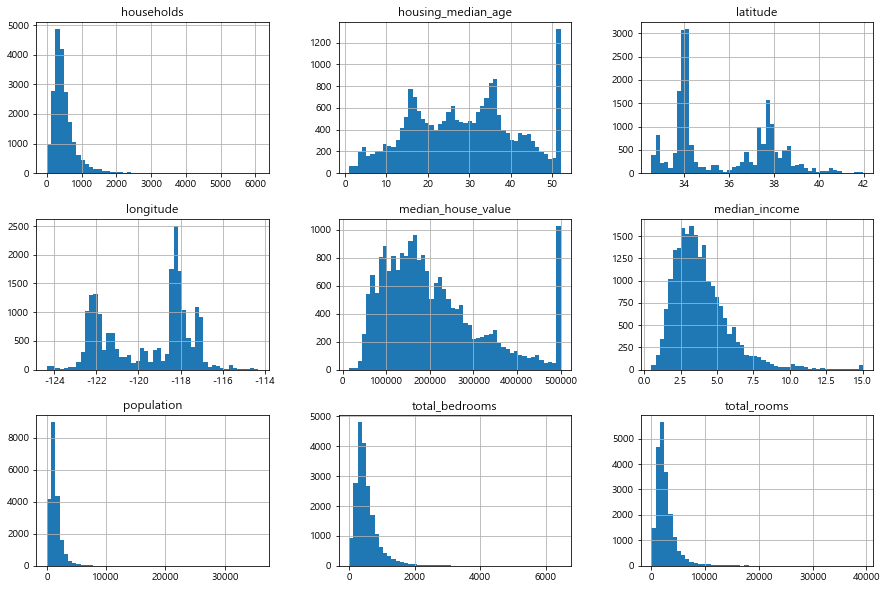

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline 
# ************************************************************ 이것이 젤 중요해 **********************
#데이터를 그림으로 놓친것이 없나 한번 더 확인 하기

#bins 는 빈도수값 
housing.hist(bins=50, figsize=(15, 10)) # histogram 그리기
plt.show()

## 3. 테스트 세트 만들기

### 3-1. 무작위 샘플링
#### 선분을 잘 그렸는지 확인 하는 과정임 ( 테스트 데이터들로 돌려보는 거 )

In [10]:
import numpy as np

In [11]:
#permutation 0~ 받은 정수까지 배열 만들고 셔플해줌 (섞어줌)
np.random.permutation(len(housing))[:4128]

array([ 9755, 10304,  9061, ..., 17644,  8756,  7326])

In [12]:
import numpy as np

np.random.seed(42) # 항상 같은 테스트 셋이 나오도록

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))  # 인덱스 셔플 (0~data의 길이만큼 random하게)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size] # test_set_size까지. random 배열을 가져옴.
    train_indices = shuffled_indices[test_set_size:] # 나머지.
    return data.iloc[train_indices], data.iloc[test_indices]


##### 주의사항: 데이터를 더 깊게 들여다보기 전에 테스트 세트를 따로 떼어놓아야 함. (뇌가 오버피팅 되어 특정 모델을 선택하는 것을 막자.)

In [13]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), 'train +', len(test_set), 'test')


16512 train + 4128 test


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# train_test_split(housing.index, 0.2)

#### 순수 무작위 샘플링 - (데이터셋이 충분히 크면 괜찮지만, 샘플링 편향 위험성)  => 계층적 샘플링이 필요

### 3-2. 층화추출법 (계층적 샘플링)

##### 계층적 샘플링: 테스트세트가 전체 모집단을 대표하도록 샘플링. (예. 남여 비율이 52:48 이라면 테스트셋도 마찬가지 비율로)
##### 계층을 나눠서 몇퍼센트씩 가져오니라  (직업별로 몇명씩, 계층 별로 몇명씩)

##### median_income을 기준으로 샘플링.  => income_cat이라는 컬럼으로

In [16]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [14]:
housing['median_income']

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Length: 20640, dtype: float64

In [18]:
housing['median_income'].head()

0    8.3252
1    8.3014
2    7.2574
3    5.6431
4    3.8462
Name: median_income, dtype: float64

In [19]:
# 계층적 샘플링을 위한 income_cat
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)  # income의 카테고리 수 제한
housing['income_cat'].value_counts()

3.0     7236
2.0     6581
4.0     3639
5.0     1423
1.0      822
6.0      532
7.0      189
8.0      105
9.0       50
11.0      49
10.0      14
Name: income_cat, dtype: int64

In [20]:
housing['income_cat'].describe()

count    20640.000000
mean         3.093362
std          1.303707
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: income_cat, dtype: float64

In [21]:

# where절 사용법: 
# where(cond, other, inplace): cond가 True => 원래값 유지, cond가 False면 other로 설정 함. inplace가 True면 중복값 덮어쓰기.
housing['income_cat'].where(housing['income_cat'] < 6, 6.0, inplace=True) # 6보다 큰 카테고리는 6로 합치자. (소득 카테고리를 나눔)
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,3.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,3.0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,3.0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,2.0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,3.0


In [22]:
housing['income_cat'].describe()

count    20640.000000
mean         3.052180
std          1.156297
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: income_cat, dtype: float64

In [23]:
housing['income_cat'].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.068944
6.0    0.045494
1.0    0.039826
Name: income_cat, dtype: float64

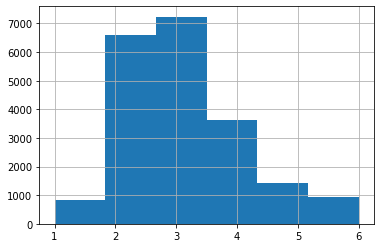

In [24]:
housing['income_cat'].hist(bins=6)

### 계층 샘플링 - sklearn-> StratifiedShuffleSplit

In [21]:
#sklearn 은 머신러닝 패키지로, feature (즉, 데이터 = x) 
#우리는 집값을 예측할거니까 median_house_value가 y값. 즉, tartget value가 되는 것이고 
# 그리고 population, total_rooms 등이 feature가 되는 것 

from sklearn.model_selection import StratifiedShuffleSplit, train_test_split

In [22]:
# StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
split


StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2,
            train_size=None)

In [23]:
# split = train_test_split(
#     housing, test_size=.2, random_state=42, 
#     stratify=housing['income_cat']
# )

In [24]:

# split.split => generator
for train_idx, test_idx in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_idx]
    strat_test_set = housing.loc[test_idx]


KeyError: 'income_cat'

In [25]:
len(strat_train_set), len(strat_test_set)

NameError: name 'strat_train_set' is not defined

#### 비율 비교

In [37]:
original_strat_ratio = housing['income_cat'].value_counts() / len(housing)
print("모집단 비율")
print(original_strat_ratio)

print("\n 테스트 비율")
test_strat_ratio = strat_test_set['income_cat'].value_counts()/len(strat_test_set)
print(test_strat_ratio)

print("\n 층화추출법: 모집단 비율 - 샘플링 비율")
print(abs(original_strat_ratio - test_strat_ratio))

모집단 비율
3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.068944
6.0    0.045494
1.0    0.039826
Name: income_cat, dtype: float64

 테스트 비율
3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.069041
6.0    0.045543
1.0    0.039729
Name: income_cat, dtype: float64

 층화추출법: 모집단 비율 - 샘플링 비율
3.0    0.000048
2.0    0.000048
4.0    0.000048
5.0    0.000097
6.0    0.000048
1.0    0.000097
Name: income_cat, dtype: float64


In [38]:
# 만약 무작위 샘플링이라면
shuffle_test = split_train_test(housing, 0.2)[1]

o_shuffle_ratio = housing['income_cat'].value_counts() / len(housing)
print("모집단 비율")
print(o_shuffle_ratio)
print()

t_shuffle_ratio = shuffle_test['income_cat'].value_counts()/len(shuffle_test)
print("\n 테스트 비율")
print(t_shuffle_ratio)

print()
print("\n 무작위 추출법: 모집단 비율 - 샘플링 비율")
print(abs(o_shuffle_ratio-t_shuffle_ratio))

모집단 비율
3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.068944
6.0    0.045494
1.0    0.039826
Name: income_cat, dtype: float64


 테스트 비율
3.0    0.349806
2.0    0.324612
4.0    0.175145
5.0    0.070494
6.0    0.042878
1.0    0.037064
Name: income_cat, dtype: float64


 무작위 추출법: 모집단 비율 - 샘플링 비율
3.0    0.000775
2.0    0.005766
4.0    0.001163
5.0    0.001550
6.0    0.002616
1.0    0.002762
Name: income_cat, dtype: float64


In [39]:
# income cat 삭제. (표본 나눴으니.)
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## 4. 데이터 이해를 위한 탐색과 시각화

In [32]:
# ************ 제일 중요해 ***************
housing = strat_train_set.copy() # 훈련 셋 손상시키지 않기 위한 복사본

NameError: name 'strat_train_set' is not defined

### 4-1. 위치데이터 시각화

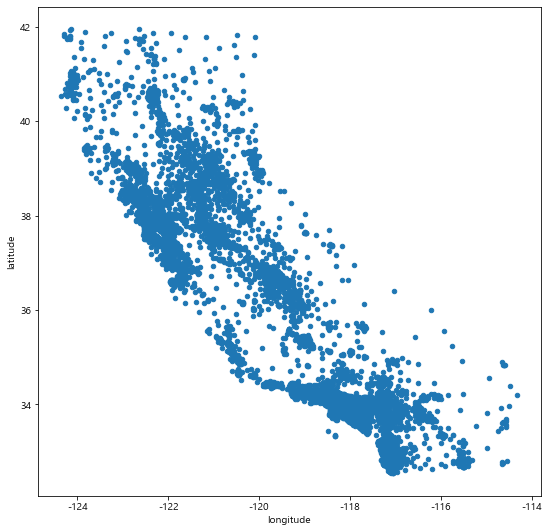

In [33]:
import matplotlib.image as mpimg

housing_plot = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(9, 9))
housing_plot.set_xlabel('longitude')
housing_plot.set_ylabel('latitude')
plt.show()


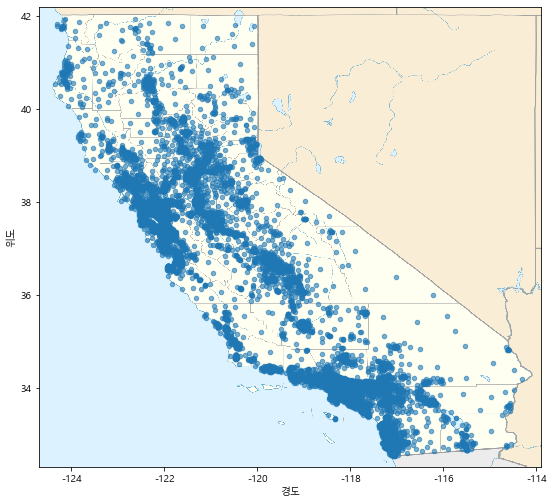

In [38]:
# 지도 출처: https://upload.wikimedia.org/wikipedia/commons/archive/f/f9/20090605191745%21USA_California_location_map.svg
map_img = mpimg.imread('datasets/califonia.png')

housing_plot = housing.plot(kind="scatter", x="longitude", y="latitude",alpha=0.6 ,figsize=(9, 9))
housing_plot.set_xlabel('경도')
housing_plot.set_ylabel('위도')
plt.imshow(map_img, extent=[-124.7, -113.9, 32.3, 42.2], alpha=0.6)

##### 밀집도 추가

In [ ]:
housing_plot = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.05, figsize=(9, 9))
housing_plot.set_xlabel('경도')
housing_plot.set_ylabel('위도')
# plt.imshow(map_img, extent=[-124.7, -113.9, 32.3, 42.2], alpha=0.6)

plt.show()

### 데이터 추가하기(집 가격, 인구수)

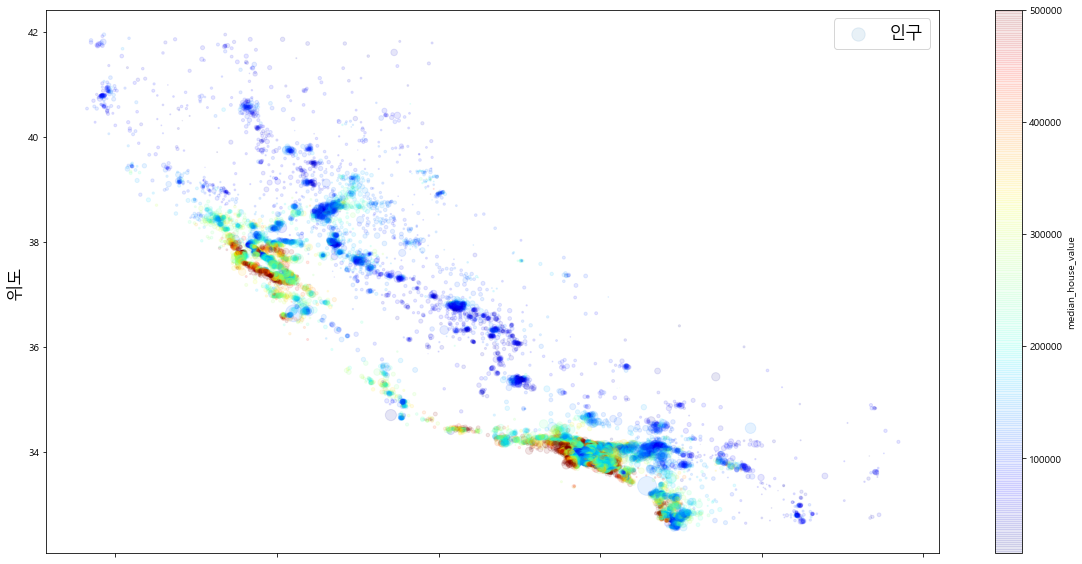

In [40]:
from matplotlib import pyplot  as plt

#s는 size, 인구밀도 
#c는 집 가격, 예측하려는 값
housing_plot = housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1,
                            s=housing['population']/100, c="median_house_value", 
                            cmap=plt.get_cmap("jet"), colorbar=True,  figsize=(20,10))

housing_plot.set_xlabel('경도', fontsize='xx-large')
housing_plot.set_ylabel('위도', fontsize='xx-large')
# plt.imshow(map_img, extent=[-124.7, -113.9, 32.3, 42.2], alpha=0.6)


plt.legend(('인구',), fontsize='xx-large')

### 4-2. 상관관계 조사

#### 표준 상관계수: Standard correlation coefficient - 피어슨 r (corr())

In [41]:
#상관관계를 알려면, corr을 쓴다 
# 절대값 1에 가까울수록 상관관계가 있다고 함
# 보통 0.3이상이면 있다고 하고, 0.7 이상이면 높고, 1이면 동일한 데이터라고 말함 
# median_house_value와 상관관계 있는 것을 찾아야제?
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [42]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [43]:
attributes = ['housing_median_age', "total_rooms", "total_bedrooms", "population", "households", "median_income", "median_house_value"]
corr_matrix[attributes]

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [44]:
%matplotlib inline

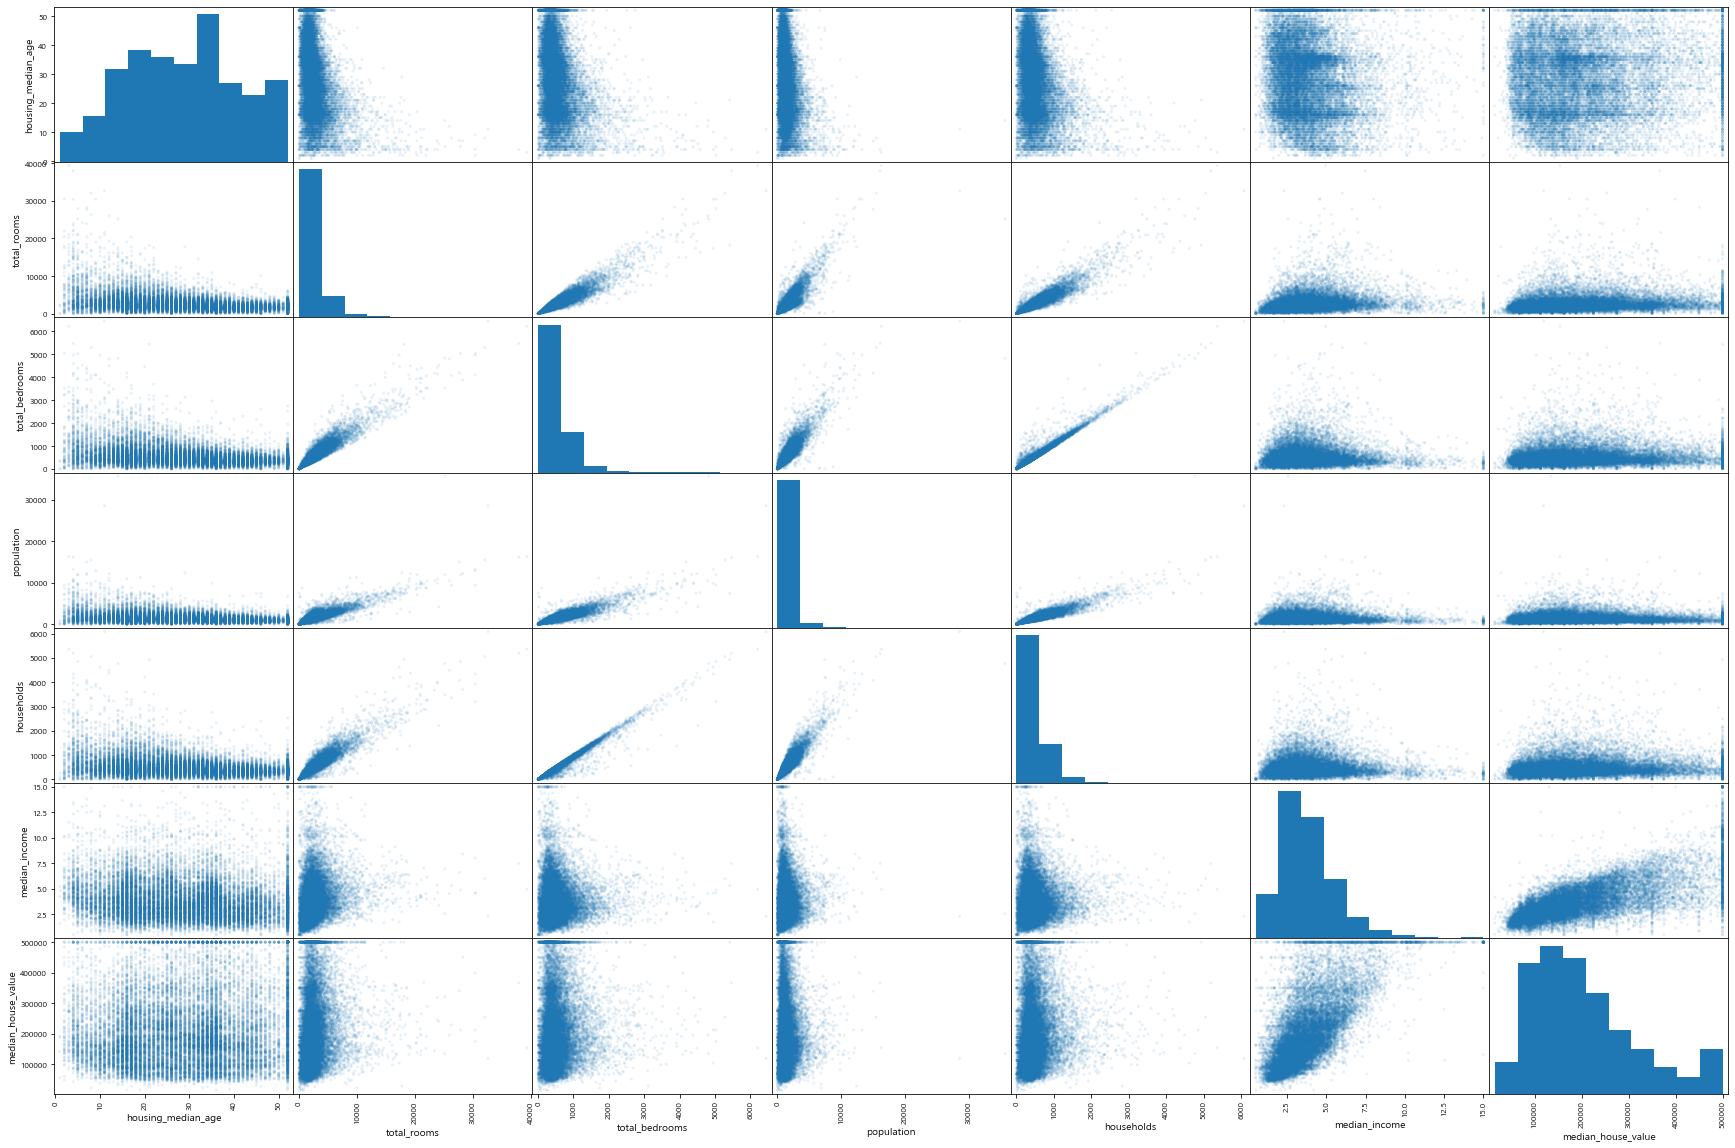

In [45]:
from pandas.plotting import scatter_matrix

scatter_matrix(housing[attributes], figsize=(30, 20), alpha=0.1)
plt.show()

#population 과 households 가 관련이 있구
#median_income과 median_house_value가 관련이 좀 있어봬네...

In [44]:
# median_income 과 median_house_value가 상관관계

### 4-3. 특성 조합

In [46]:
housing['rooms_per_houshold'] = housing['total_rooms']/housing['households'] # 가구당 방 개수
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms'] # 전체 방당 침실개수
housing['bedrooms_per_household'] = housing['total_bedrooms']/housing['households'] # 가구당 침실개수
housing['population_per_household'] = housing['population']/housing['households'] # 평균 한 가구 인원

In [47]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

# 추가 특성
# rooms_per_houshold , bedrooms_per_room 가 다른 특성보다 상관관계가 높은편!

median_house_value          1.000000
median_income               0.688075
rooms_per_houshold          0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
bedrooms_per_household     -0.046739
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

## 5. 데이터처리 - 머신러닝 알고리즘 위한 데이터 준비

In [ ]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set['median_house_value'].copy()
# housing복사본 만듬 -> 예측 변수만 분리

In [ ]:
housing.info()

### 5-0. 데이터 이해하기

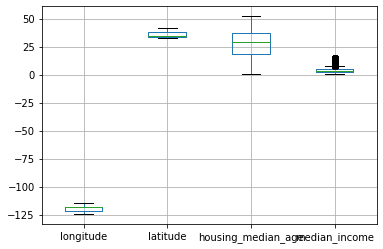

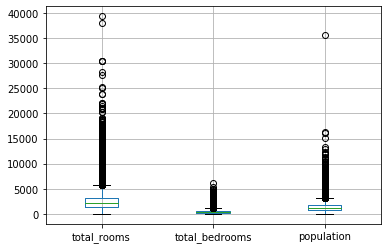

In [46]:
# boxplot
#한 화면, 다른 도화지에 그려보겠음
plt.figure(1)
box_plot_attr = ['longitude', 'latitude', 'housing_median_age', 'median_income']
housing.boxplot(box_plot_attr, figsize=(9,9))

plt.figure(2)
box_plot_attr2 = ['total_rooms', 'total_bedrooms', 'population']
housing.boxplot(box_plot_attr2, figsize=(9,9))


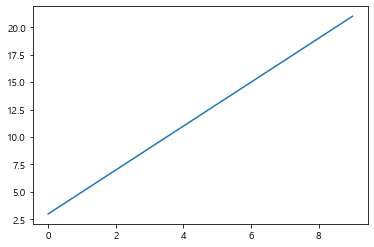

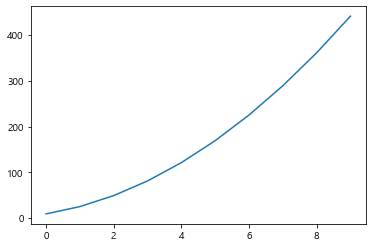

In [48]:
x = np.arange(10)
y= x *2 +3
plt.figure(1)
plt.plot(x,y)

plt.figure(2)
plt.plot(x,y**2)

In [50]:
#서브 플롯 막간 실습
x = np.arange(1,20)
y1 = 2 *x + 3
y2 = x**2 -10
y3 = x**3 -10
y4 = np.log(x)



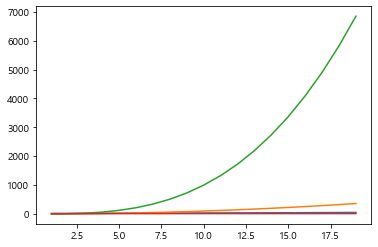

In [53]:
#low index, colum index 순으로 들어감 즉, 2행 2열 중 첫번째 꺼 쓰겠음
plt.subplot(2,2,1)
plt.plot(x,y1)

plt.subplot(2,2,2)
plt.plot(x,y2)

plt.subplot(2,2,3)
plt.plot(x,y3)

plt.subplot(2,2,4)
plt.plot(x,y4)

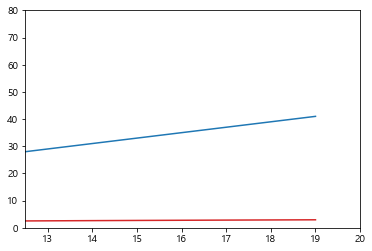

In [57]:
#xlim 을 이용해서 확대해서 보기
# x는 12.5~ 20 , y는 0~800 까지 부분을 확대해서 보겠음


plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)
plt.xlim([12.5, 20])
plt.ylim([0,80])
plt.show()

In [61]:
corr = housing.corr()
corr.style.background_gradient(cmap='coolwarm')
#1에 가까울수록 빨강색, -1에 가까울수록 퍼렁색

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_houshold,bedrooms_per_room,bedrooms_per_household,population_per_household
longitude,1,-0.924664,-0.108197,0.044568,0.069608,0.0997732,0.0553101,-0.0151759,-0.0459666,-0.0275401,0.0926568,0.0134016,0.00247582
latitude,-0.924664,1,0.0111727,-0.0360996,-0.0669828,-0.108785,-0.0710354,-0.0798091,-0.14416,0.106389,-0.113815,0.070025,0.00236618
housing_median_age,-0.108197,0.0111727,1,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.136089,-0.0779176,0.0131914
total_rooms,0.044568,-0.0360996,-0.361262,1,0.93038,0.857126,0.918484,0.19805,0.134153,0.133798,-0.1879,0.0293734,-0.0245807
total_bedrooms,0.069608,-0.0669828,-0.320451,0.93038,1,0.877747,0.979728,-0.00772285,0.0496862,0.00153765,0.0842381,0.0458874,-0.0283549
population,0.0997732,-0.108785,-0.296244,0.857126,0.877747,1,0.907222,0.00483435,-0.0246497,-0.0722128,0.0353193,-0.0665104,0.0698627
households,0.0553101,-0.0710354,-0.302916,0.918484,0.979728,0.907222,1,0.0130331,0.0658427,-0.0805977,0.0650869,-0.0551584,-0.0273094
median_income,-0.0151759,-0.0798091,-0.119034,0.19805,-0.00772285,0.00483435,0.0130331,1,0.688075,0.326895,-0.615661,-0.0622989,0.0187662
median_house_value,-0.0459666,-0.14416,0.105623,0.134153,0.0496862,-0.0246497,0.0658427,0.688075,1,0.151948,-0.25588,-0.0467395,-0.0237374
rooms_per_houshold,-0.0275401,0.106389,-0.153277,0.133798,0.00153765,-0.0722128,-0.0805977,0.326895,0.151948,1,-0.416952,0.848616,-0.00485229


###  5-1. 결측값 처리

##### 5-1-1. 삭제

In [62]:
# 삭제
# housing.dropna(subset=['total_bedrooms']) 
housing.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 14 columns):
longitude                   20433 non-null float64
latitude                    20433 non-null float64
housing_median_age          20433 non-null float64
total_rooms                 20433 non-null float64
total_bedrooms              20433 non-null float64
population                  20433 non-null float64
households                  20433 non-null float64
median_income               20433 non-null float64
median_house_value          20433 non-null float64
ocean_proximity             20433 non-null object
rooms_per_houshold          20433 non-null float64
bedrooms_per_room           20433 non-null float64
bedrooms_per_household      20433 non-null float64
population_per_household    20433 non-null float64
dtypes: float64(13), object(1)
memory usage: 2.3+ MB


In [63]:
# 열 제거
housing.drop('total_bedrooms', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
longitude                   20640 non-null float64
latitude                    20640 non-null float64
housing_median_age          20640 non-null float64
total_rooms                 20640 non-null float64
population                  20640 non-null float64
households                  20640 non-null float64
median_income               20640 non-null float64
median_house_value          20640 non-null float64
ocean_proximity             20640 non-null object
rooms_per_houshold          20640 non-null float64
bedrooms_per_room           20433 non-null float64
bedrooms_per_household      20433 non-null float64
population_per_household    20640 non-null float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


##### 5-1-2. 대표값으로 대체

In [65]:
#중간값을 대표값으로둘거라 
housing.median()


longitude                     -118.490000
latitude                        34.260000
housing_median_age              29.000000
total_rooms                   2127.000000
total_bedrooms                 435.000000
population                    1166.000000
households                     409.000000
median_income                    3.534800
median_house_value          179700.000000
rooms_per_houshold               5.229129
bedrooms_per_room                0.203162
bedrooms_per_household           1.048889
population_per_household         2.818116
dtype: float64

In [66]:
median = housing.median()
median

longitude                     -118.490000
latitude                        34.260000
housing_median_age              29.000000
total_rooms                   2127.000000
total_bedrooms                 435.000000
population                    1166.000000
households                     409.000000
median_income                    3.534800
median_house_value          179700.000000
rooms_per_houshold               5.229129
bedrooms_per_room                0.203162
bedrooms_per_household           1.048889
population_per_household         2.818116
dtype: float64

In [67]:
# 대표값으로 대체

# median = housing['total_bedrooms'].median() # option3: 중간값 채우기
# housing['total_bedrooms'] = housing['total_bedrooms'].fillna(median)
# housing.info()
median = housing.median()
# print(housing.fillna(median).describe())
#fillna를 하면 ()안의 값으로 na가 채워짐
housing.fillna(median).info()


# housing.info()
# 중간값 계산할 경우. 저장해 놓아야함( 테스트셋에서도 누락된 값을 바꾸고, 실제 운영시에도 바꿔야 함.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
longitude                   20640 non-null float64
latitude                    20640 non-null float64
housing_median_age          20640 non-null float64
total_rooms                 20640 non-null float64
total_bedrooms              20640 non-null float64
population                  20640 non-null float64
households                  20640 non-null float64
median_income               20640 non-null float64
median_house_value          20640 non-null float64
ocean_proximity             20640 non-null object
rooms_per_houshold          20640 non-null float64
bedrooms_per_room           20640 non-null float64
bedrooms_per_household      20640 non-null float64
population_per_household    20640 non-null float64
dtypes: float64(13), object(1)
memory usage: 2.2+ MB


##### 5-1-2. 부록: imputer 사용하기

In [53]:
# strat_train_set.info()
# imputer는 변환기 정도로 생각하면 됨 
# imputer를 사용하면 일괄처리에 유리해짐

In [69]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
imputer

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [70]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [71]:
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_houshold,bedrooms_per_room,bedrooms_per_household,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,1.023810,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,0.971880,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,1.073446,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,1.073059,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,1.081081,2.181467


In [72]:
# imputer 사용하기: 수치형 특성에서만 계산될 수 있음.
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [73]:
# imputer의 statistics에 저장됨.! (새로운 데이터에서 어떤 값이 누락될지 모르므로, 모든 수치형 특성에 imputer를 적용하자)
imputer.statistics_

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        1.79700000e+05,  5.22912879e+00,  2.03162434e-01,  1.04888889e+00,
        2.81811565e+00])

In [74]:
housing_num.median().values

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        1.79700000e+05,  5.22912879e+00,  2.03162434e-01,  1.04888889e+00,
        2.81811565e+00])

In [75]:
#imputer 객체로 훈련세트에서 누락된 값을 학습한 중간값으로 변경
#중간값을 빼서 fillna로 채워넣는 것과 같은 효과

X = imputer.transform(housing_num)
X
# => 결과는 numpy 배열 (housing_num에서 변형된 특성) => pandas로 만들기

array([[-122.23      ,   37.88      ,   41.        , ...,    0.14659091,
           1.02380952,    2.55555556],
       [-122.22      ,   37.86      ,   21.        , ...,    0.15579659,
           0.97188049,    2.10984183],
       [-122.24      ,   37.85      ,   52.        , ...,    0.12951602,
           1.07344633,    2.80225989],
       ...,
       [-121.22      ,   39.43      ,   17.        , ...,    0.21517303,
           1.12009238,    2.3256351 ],
       [-121.32      ,   39.43      ,   18.        , ...,    0.21989247,
           1.17191977,    2.12320917],
       [-121.24      ,   39.37      ,   16.        , ...,    0.22118492,
           1.16226415,    2.61698113]])

In [61]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=list(housing.index.values))
housing_tr.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_houshold,bedrooms_per_room,bedrooms_per_household,population_per_household
6895,-118.11,34.04,28.0,3913.0,696.0,2264.0,697.0,5.2446,258000.0,5.614060,0.177869,0.998565,3.248207
2880,-118.97,35.38,35.0,1673.0,426.0,1041.0,413.0,1.3750,57500.0,4.050847,0.254632,1.031477,2.520581
13769,-117.03,34.07,16.0,3784.0,577.0,1615.0,525.0,4.2333,220300.0,7.207619,0.152484,1.099048,3.076190
18349,-122.17,37.43,24.0,3924.0,1142.0,7174.0,950.0,4.0972,387500.0,4.130526,0.291030,1.202105,7.551579
16188,-121.31,37.96,48.0,1112.0,227.0,583.0,216.0,2.3393,77600.0,5.148148,0.204137,1.050926,2.699074
14468,-117.26,32.85,30.0,3652.0,499.0,978.0,462.0,8.2374,500001.0,7.904762,0.136637,1.080087,2.116883
6861,-118.13,34.06,30.0,1692.0,398.0,1130.0,365.0,2.8672,198500.0,4.635616,0.235225,1.090411,3.095890
17344,-120.43,34.86,17.0,3172.0,506.0,1538.0,473.0,4.3125,168100.0,6.706131,0.159521,1.069767,3.251586
3981,-118.60,34.19,16.0,14912.0,4183.0,5105.0,3302.0,2.8312,213900.0,4.516051,0.280512,1.266808,1.546033
19222,-122.70,38.46,29.0,2891.0,459.0,1012.0,441.0,5.0415,240200.0,6.555556,0.158769,1.040816,2.294785


##### 5-1-3. 예측값 삽입 (Feature를 위한 머신러닝)

In [62]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_houshold,bedrooms_per_room,bedrooms_per_household,population_per_household
count,16512.000000,16512.00000,16512.000000,16512.000000,16358.000000,16512.000000,16512.00000,16512.000000,16512.000000,16512.000000,16358.000000,16358.000000,16512.000000
mean,-119.572346,35.63674,28.628513,2628.114583,535.663529,1422.758600,497.75327,3.873473,206893.947614,5.438873,0.212863,1.098661,3.098006
std,2.001511,2.13778,12.586026,2157.526589,413.333152,1120.859666,376.32796,1.900464,115457.615892,2.606392,0.057366,0.508801,11.585044
min,-124.350000,32.54000,1.000000,6.000000,1.000000,3.000000,1.00000,0.499900,14999.000000,1.130435,0.100000,0.333333,0.692308
25%,-121.800000,33.93000,18.000000,1445.000000,295.000000,786.000000,279.00000,2.566775,119800.000000,4.441216,0.175247,1.005556,2.431714
50%,-118.510000,34.26000,29.000000,2123.500000,433.500000,1166.000000,408.00000,3.540900,179500.000000,5.232342,0.203021,1.048617,2.820179
75%,-118.010000,37.72000,37.000000,3143.250000,645.000000,1720.000000,603.00000,4.744475,264000.000000,6.056697,0.239774,1.099330,3.282433
max,-114.310000,41.95000,52.000000,39320.000000,6210.000000,35682.000000,5358.00000,15.000100,500001.000000,141.909091,1.000000,34.066667,1243.333333


### 5-2. 텍스트와 범주형 특성 다루기

##### 5-2-1. LabelEncoding 예시

In [63]:
housing_cat = housing['ocean_proximity']
housing_cat.head(10)

6895      <1H OCEAN
2880         INLAND
13769        INLAND
18349    NEAR OCEAN
16188        INLAND
14468    NEAR OCEAN
6861      <1H OCEAN
17344     <1H OCEAN
3981      <1H OCEAN
19222     <1H OCEAN
Name: ocean_proximity, dtype: object

In [64]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     7273
INLAND        5268
NEAR OCEAN    2114
NEAR BAY      1855
ISLAND           2
Name: ocean_proximity, dtype: int64

In [65]:
# 머신러닝 알고리즘은 대부분 숫자형을 다룸 -> 각 카테고리를 다른 정숫값으로 매핑
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]


array([0, 1, 1, 2, 1, 2, 0, 0, 0, 0], dtype=int64)

In [66]:
housing_categories

Index(['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')


##### 5-2-2. OnehotEncoding 예시

In [67]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories='auto')
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

### 5-3. feature scaling

In [68]:
# 스케일링을 비슷하게 만들어준다. (0~1사이에 위치하도록)
# 1. min-max 스케일링: (data-min_value)/(max_value-min_value) 
# MinMaxScaler변환기

# 2. 표준화: (data-mean)/std ==> 분산이 1이 됨: 평균이 0이 됨
# StandardScaler 변환기
# 범위의 상한과 하한이 없어서 신경망에서는 사용 못함.
# 그러나 표준화는 이상치에 영향을 덜 받음.

# 만약 중간소득을 실수로 100이라고 입력한 구역이 있으면,,,, 
# min-max는 0~15사이에 모든 값을 0~0.15로 만듬
# 표준화는 크게 영향 받지 않음(평균으로 하기 때문에.)

housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_houshold,bedrooms_per_room,bedrooms_per_household,population_per_household
count,16512.000000,16512.00000,16512.000000,16512.000000,16358.000000,16512.000000,16512.00000,16512.000000,16512.000000,16512.000000,16358.000000,16358.000000,16512.000000
mean,-119.572346,35.63674,28.628513,2628.114583,535.663529,1422.758600,497.75327,3.873473,206893.947614,5.438873,0.212863,1.098661,3.098006
std,2.001511,2.13778,12.586026,2157.526589,413.333152,1120.859666,376.32796,1.900464,115457.615892,2.606392,0.057366,0.508801,11.585044
min,-124.350000,32.54000,1.000000,6.000000,1.000000,3.000000,1.00000,0.499900,14999.000000,1.130435,0.100000,0.333333,0.692308
25%,-121.800000,33.93000,18.000000,1445.000000,295.000000,786.000000,279.00000,2.566775,119800.000000,4.441216,0.175247,1.005556,2.431714
50%,-118.510000,34.26000,29.000000,2123.500000,433.500000,1166.000000,408.00000,3.540900,179500.000000,5.232342,0.203021,1.048617,2.820179
75%,-118.010000,37.72000,37.000000,3143.250000,645.000000,1720.000000,603.00000,4.744475,264000.000000,6.056697,0.239774,1.099330,3.282433
max,-114.310000,41.95000,52.000000,39320.000000,6210.000000,35682.000000,5358.00000,15.000100,500001.000000,141.909091,1.000000,34.066667,1243.333333


##### 5-3-1. min-max scaling (min-max normalization)

In [69]:
from sklearn.preprocessing import MinMaxScaler

A = MinMaxScaler().fit_transform(housing.drop('ocean_proximity',axis=1))
min_max_columns = housing.columns.copy().drop('ocean_proximity')

min_max_housing = pd.DataFrame(A, columns=min_max_columns, index=housing.index)

min_max_housing.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_houshold,bedrooms_per_room,bedrooms_per_household,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16358.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16358.000000,16358.000000,16512.000000
mean,0.475862,0.329090,0.541736,0.066697,0.086111,0.039793,0.092730,0.232657,0.395658,0.030604,0.125403,0.022688,0.001936
std,0.199354,0.227182,0.246785,0.054879,0.066570,0.031415,0.070250,0.131065,0.238056,0.018514,0.063740,0.015083,0.009323
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253984,0.147715,0.333333,0.036603,0.047351,0.021946,0.051895,0.142541,0.216084,0.023518,0.083608,0.019928,0.001400
50%,0.581673,0.182784,0.549020,0.053861,0.069657,0.032596,0.075975,0.209721,0.339176,0.029137,0.114468,0.021204,0.001712
75%,0.631474,0.550478,0.705882,0.079800,0.103720,0.048124,0.112376,0.292725,0.513402,0.034993,0.155304,0.022707,0.002084
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### 5-3-2. Standardization

In [70]:
from sklearn.preprocessing import StandardScaler

B = StandardScaler().fit_transform(housing.drop('ocean_proximity',axis=1))
std_columns = housing.columns.copy().drop('ocean_proximity')

std_housing = pd.DataFrame(B, columns=std_columns, index=housing.index)

std_housing.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_houshold,bedrooms_per_room,bedrooms_per_household,population_per_household
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.635800e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.635800e+04,1.635800e+04,1.651200e+04
mean,-8.223396e-15,-2.962316e-15,5.276787e-17,-7.929972e-17,9.507277e-17,-1.048903e-17,4.541883e-17,1.097313e-16,7.960902e-17,-6.957720e-17,3.105747e-17,6.858298e-17,3.313456e-17
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000031e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000031e+00,1.000031e+00,1.000030e+00
min,-2.387097e+00,-1.448621e+00,-2.195240e+00,-1.215370e+00,-1.293581e+00,-1.266708e+00,-1.320041e+00,-1.775185e+00,-1.662088e+00,-1.653078e+00,-1.967480e+00,-1.504226e+00,-2.076618e-01
25%,-1.113020e+00,-7.983943e-01,-8.444949e-01,-5.483828e-01,-5.822685e-01,-5.681156e-01,-5.813012e-01,-6.875886e-01,-7.543598e-01,-3.827848e-01,-6.557416e-01,-1.829963e-01,-5.751484e-02
50%,5.307880e-01,-6.440239e-01,2.951676e-02,-2.338928e-01,-2.471775e-01,-2.290799e-01,-2.385047e-01,-1.750008e-01,-2.372713e-01,-7.924265e-02,-1.715756e-01,-9.836104e-02,-2.398226e-02
75%,7.806068e-01,9.745262e-01,6.651616e-01,2.387693e-01,2.645319e-01,2.651986e-01,2.796760e-01,4.583244e-01,4.946212e-01,2.370493e-01,4.691227e-01,1.314342e-03,1.591991e-02
max,2.629267e+00,2.953274e+00,1.856996e+00,1.700697e+01,1.372866e+01,3.056607e+01,1.291531e+01,5.854869e+00,2.538732e+00,5.236141e+01,1.372172e+01,6.479749e+01,1.070581e+02


### 5-4. 변환 파이프라인

##### 5-4-1. 변환기 만들기

In [71]:
# 변환기 만들기
# fit과 transform
from sklearn.base import BaseEstimator, TransformerMixin

rooms_idx, bedrooms_idx, population_idx, household_idx = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_idx] / X[:, household_idx]
        population_per_household = X[:, population_idx]/X[:, household_idx]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_idx] / X[:, rooms_idx]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

# 모든 파이프라인은 (이름, 추정기)
# 마지막 단계에서는 반드시 fit_transform()메소드를 가지고 있어야 함
# 파이프라인이 하나씩 호출하면서 출력을 다음 단계의 입력으로 전달함.

array([[ 0.73064307, -0.74693746, -0.04993885, ...,  0.06721658,
         0.01296542, -0.54866676],
       [ 0.30095459, -0.12010014,  0.50625037, ..., -0.53256277,
        -0.04984379,  0.62774704],
       [ 1.27025185, -0.73290379, -1.00340609, ...,  0.6786392 ,
        -0.00188314, -0.93768728],
       ...,
       [-1.50273773,  1.09615139,  1.85699563, ...,  0.21140012,
        -0.06279387, -0.46924885],
       [ 0.56576261, -0.66741332,  0.66516158, ..., -0.22431894,
        -0.01298992, -0.19109249],
       [ 1.33020838, -1.32231799, -0.52667247, ...,  0.45407106,
        -0.00977986, -1.02051875]])

##### 데이터프레임 셀렉터 클래스 - 파이프라인 처리하기

In [73]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    """
    데이터프레임에서 필요한 속성만 셀렉트하도록
    """
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values

##### 5-4.2 파이프라인 연결하기

In [74]:
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']


num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder',  OneHotEncoder(categories='auto',sparse=False)),
])



In [75]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])
full_pipeline

FeatureUnion(n_jobs=None,
             transformer_list=[('num_pipeline',
                                Pipeline(memory=None,
                                         steps=[('selector',
                                                 DataFrameSelector(attribute_names=['longitude',
                                                                                    'latitude',
                                                                                    'housing_median_age',
                                                                                    'total_rooms',
                                                                                    'total_bedrooms',
                                                                                    'population',
                                                                                    'households',
                                                                                    'median_income',
              

In [76]:
# pipeline 실행
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[ 0.73064307, -0.74693746, -0.04993885, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.30095459, -0.12010014,  0.50625037, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.27025185, -0.73290379, -1.00340609, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.50273773,  1.09615139,  1.85699563, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.56576261, -0.66741332,  0.66516158, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.33020838, -1.32231799, -0.52667247, ...,  0.        ,
         0.        ,  0.        ]])

In [77]:
housing_prepared.shape

(16512, 21)

In [78]:
housing_prepared

array([[ 0.73064307, -0.74693746, -0.04993885, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.30095459, -0.12010014,  0.50625037, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.27025185, -0.73290379, -1.00340609, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.50273773,  1.09615139,  1.85699563, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.56576261, -0.66741332,  0.66516158, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.33020838, -1.32231799, -0.52667247, ...,  0.        ,
         0.        ,  0.        ]])

## 6. 모델 선택과 훈련

우린 다음을 수행했음
1. 문제 정의
2. 데이터 읽고 탐색
3. 훈련세트와 테스트 세트 나누고
4. 머신러닝 알고리즘에 주입할 데이터를 자동으로 정제하고 준비하기 위해 변환 파이프라인 작성
5. ---- 머신러닝 모델 선택하고 훈련하자

#### 훈련하기1 - LinearRegression

In [85]:
housing_prepared

array([[ 0.73064307, -0.74693746, -0.04993885, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.30095459, -0.12010014,  0.50625037, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.27025185, -0.73290379, -1.00340609, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.50273773,  1.09615139,  1.85699563, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.56576261, -0.66741332,  0.66516158, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.33020838, -1.32231799, -0.52667247, ...,  0.        ,
         0.        ,  0.        ]])

In [86]:
housing_labels = housing_num['median_house_value']

In [100]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
lin_reg.score(housing_prepared, housing_labels)

1.0

#### 훈련평가하기1 - LinearRegression

In [102]:
# lin_reg.score(housing_prepared, housing_labels)

In [103]:
# test_set

In [104]:
some_data = housing.iloc[:10]
some_labels = housing_labels.iloc[:10]
some_data_prepared = full_pipeline.transform(some_data)
print("예측: ", lin_reg.predict(some_data_prepared))
print("레이블: ", list(some_labels))

# 그닥 정확한 예측은 아니지만. 작동은 함

예측:  [258000.  57500. 220300. 387500.  77600. 500001. 198500. 168100. 213900.
 240200.]
레이블:  [258000.0, 57500.0, 220300.0, 387500.0, 77600.0, 500001.0, 198500.0, 168100.0, 213900.0, 240200.0]


In [105]:
# 전체 MSE측정
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)
lin_mse
# 이렇게 평가가 끝났음. => 좋은 점수가 아님. (과소적합!) 
# 이유는?: 모델이 안 좋거나, 특성들이 충분한 정보를 제공하지 못했거나.
# 해결책은?: 모델은 바꾸거나 더 좋은 특성을 주입하거나 모델의 규제를 감소시키거나

# dir(lin_reg)
# lin_reg.normalize

2.3446608830114537e-10


5.497434656324049e-20

#### 훈련하기2 - DecisionTreeRegressor

In [106]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [107]:
tree_reg.score(housing_prepared, housing_labels)

1.0

#### 훈련평가하기2 - DecisionTreeRegressor

In [108]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

## 과대적합... 
# 확신이 들기전까지는 테스트 셋 사용하지 말고, 
# 훈련은 훈련셋에 일부로, 나머지는 모델 검증에 사용

0.0

#### 훈련평가하기2-2. k-fold cross-validation (교차 검증) DecisionTree

In [109]:
# cv개로 나눠서 10번 훈련하고 평가하는데 
# 1개는 돌아가면서 검증 세트로
# 그 외 나머지는 훈련세트로 하여
# 스코어를 정함.
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([101.77004892, 215.12145339, 148.62584782, 109.70474112,
       122.1897919 , 372.12862088, 104.53090971, 106.16947014,
        99.11785348, 206.48921493])

In [110]:
tree_rmse_scores.mean()

158.58479522974986

In [111]:
tree_rmse_scores.std()

82.06013076379558

#### 훈련평가하기1-2. k-fold cross-validation (교차 검증)  LinearRegression

In [112]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
lin_rmse_scores

array([1.42305951e-10, 1.04297602e-10, 1.38303140e-10, 1.42469728e-10,
       1.28773769e-10, 1.20936162e-10, 1.06226089e-10, 2.70430253e-10,
       1.55419397e-10, 1.61522801e-10])

In [113]:
lin_rmse_scores.mean()

1.4706848933501693e-10

In [114]:
lin_rmse_scores.std()

4.486925124150145e-11

#### 훈련하기3 - RandomForestRegressor
- 특성을 무작위로 선택해서 많은 결정 트리를 만들고 예측을 평균냄

In [115]:
# 앙상블 학습: 여러 다른 모델을 모아서 하나의 모델을 만드는 것
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
forest_reg

C:\ProgramData\Anaconda3\envs\study\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

#### 훈련평가하기3 - RandomForestRegressor

In [116]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

51.772566449317836

#### 훈련평가하기3-2. k-fold cross-validation (교차 검증)  RandomForestRegressor

In [ ]:
forest_mse_score = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

forest_rmse_score = np.sqrt(-forest_mse_score)
forest_rmse_score

In [ ]:
forest_rmse_score.mean()

# 역시 과대 적합 - 그래도 훨씬 나음

In [ ]:
forest_rmse_score.std()

##### 과대적합 해결하기: 모델 간단히 하기 or regualrization or 더 많은 data
--> 가능성 있는 2~5개의 모델을 선정하는 것이 목적

***Tip:** pickle패키지나 joblib을 사용하여 사이킷런 모델을 간단하게 저장하자.

## 8. 모델 세뷰 튜닝
가능성 있는 모델들을 추렸다고 가정. -> 세부 튜닝해야 함

###  8-1-1. 그리드 탐색
단순한 방법: 하이퍼파라미터 조합을 찾을 때까지 수동으로 하이퍼파라미터를 조정하는 것.
- sklearn.model_selection import GridSearchCV
-> 가능한 모든 하이퍼파라미터 조합에 대해 교차 검증을 사용함.
- 비교적 적은 수의 조합을 탐구할 때 괜찮음

##### RandomForestRegressor에 대한 최적의 하이퍼파라미터 조합을 그리드 탐색

In [117]:
from sklearn.model_selection import GridSearchCV

# param_grid에 대한 첫번째 dict에 있는 하이퍼 파라미터의 조합을 시도,, 
# 그다음 두번째 dict에 대한 하이퍼 파라미터에 대한 조합을 시도
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8, 10]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}    
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


In [120]:
# 최적의 조합
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [119]:
# 최적의 추정기
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [ ]:
# cv 결과
cvres = grid_search.cv_results_
cvres

In [ ]:
# 평가 점수
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)
    
# 살짝 낫쥬?

###  8-1-2. 랜덤 탐색
- 하이퍼파라미터 탐색 공간이 커지면 RandomizedSearchCV
- 각 반복마다 하이퍼파라미터에 임의의 수를 대입하여 지정한 횟수만큼 평가.

장점:
1. 랜덤 탐색 1,000회 반복시 하이퍼파라미터마다 각기 다른 1,000개의 값 탐색 (그리드는 몇개의 값만 탐색)
2. 단순히 반복 횟수를 조절 -> 컴퓨팅 자원을 제어할 수 있음

###  8-3. 앙상블 방법
- 최상의 모델을 연결해보기. (결정 트리의 앙상블인 랜덤 포레스트가 결정 트리 하나보다 더 성능이 좋은 것처럼)

###  8-4. 최상의 모델과 오차 분석
- 최상의 모델을 분석하면 문제에 대한 좋은 통찰력 얻을 수 있음.
- RandomForestRegressor가 정확한 예측을 만들기 위한 각 특성의 상대적인 중요도를 알려줌.


In [ ]:
# feature에 대한 중요도를 확인할 수 있음.
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

In [ ]:
extra_attribs = ['rooms_per_household', 'population_per_household', 'bedrooms_per_room']
cat_one_hot_attribs = list(housing_categories)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

sorted(zip(feature_importances, attributes), reverse=True)

# 중요도가 확연히 보이쥬?

##  8-5. 테스트 셋으로 시스템 평가하기

In [ ]:
# 테스트 셋에서 feature와 레이블을 얻은 후
# full_pipeline으로 데이터를 변환하고
# 최종 모델 평가

final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse


##  9. 론칭, 모니터링, 유지보수

1. 모니터링 코드: 실시간 성능 체크 - 성능 떨어졌을시 알람
2. 시스템 예측 샘플링 및 평가 - 사람의 분석이 필요.
3. 입력 데이터 품질 평가 (시스템 입력을 모니터링 - 쓰레기가 들어가면 쓰레기가 나온다. (센서 고장 체크))
4. 새로운 데이터를 사용해 정기적으로 모델을 훈련 (자동화)